<a href="https://colab.research.google.com/github/cltl/python-for-text-analysis/blob/colab/Chapters-colab/Chapter_16_Data_formats_I_(CSV_and_TSV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/Data.zip
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/images.zip
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/Extra_Material.zip

!unzip Data.zip -d ../
!unzip images.zip -d ./
!unzip Extra_Material.zip -d ../

!rm Data.zip
!rm Extra_Material.zip
!rm images.zip

# Chapter 16: Data formats I (CSV and TSV)

In the subsequent chapters, we will introduce you to several data formats. In the previous chapters, you have already worked with plain text. Now, we are going to work with: 

* tables (CSV/TSV) 
* JSON
* XML 

These formats are simply the result of agreements that were made between people on how to organize and store data. Some formats, such as XML and RDF, have a high degree of structure, whereas plain text is a typical example of unstructured data. Structuring data according to predefined specifications allows information in the data to be easily ordered and processed by machines. You can compare highly structured data with a perfectly organized filing cabinet where everything is identified, labeled, and easy to access.

**In general, you can treat any of these data formats as a text file with certain regularities people have agreed on**. You can simply read in the file and use the tools you already to exploit these regularities and access information. For some data formats with rather complex structures (such as XML), it is more convenient to use existing python packages to extract information. 

This notebook introduces tabular formats: CSV/TSV. TSV/CSV is a highly transparent way of structuring data in tables. It is a rather straightforward structure and does not necessarily require specific Python packages. 

**At the end of this chapter, you will be able to:**
* read CSV/TSV data
* manipulate CSV/TSV data
* write CSV/TSV data

**If you want to learn more about these topics, you might find the following links useful:**
* [Tutorial: Reading and Manipulating CSV Files](https://www.protechtraining.com/blog/post/python-for-beginners-reading-manipulating-csv-files-737)
* If you want more Raymond Hettinger content and learn about his opinion on what makes good python programers, [this video](https://www.youtube.com/watch?v=UANN2Eu6ZnM) is for you.


If you have **questions** about this chapter, please contact us at cltl.python.course@gmail.com.

## 1. Introduction to CSV and TSV (tables)
The **table** is probably one of the most common and intuitive data formats. Undoubtedly, you have already worked with tabular data in Excel, Numbers, or Google Sheets. A table represents a set of data points as a series of rows, with a column for each of the data points' properties. In other words: a table has vertical **columns** (often identifiable by name) and horizontal **rows**, and the **cells** are the unit where a row and column intersect. This is a very simple example:

| name     | house      | patronus |  
|----------|------------|----------| 
| Harry    | Gryffindor | stag     | 
| Hermione | Gryffindor | otter    | 
| Draco    | Slytherin  | unknown  | 
| Hannah   | Hufflepuff | unknown  | 

Tabular data can be encoded as **CSV (comma-separated values) or TSV (tab-separated values)**. CSV and TSV files are simply plain text files in which each line represents a row, and the columns are separated by a comma (for CSV) or a tab character (for TSV).





In [2]:
!ls ../Data

authorship  csv_data   json_data     lyrics	RedCircle   xml_data
books	    Dodds2014  LCohen	     MSCOCO	scripts
Charlie     Dreams     linguistlist  README.md	SUBTLEX-US


You can find examples of CSV files in the folder `../Data/csv_data`. For instance, look at the files in `../Data/csv_data/baby_names/names_by_state/`. If you like, open them in a text editor (e.g., [Atom](https://atom.io/), [BBEdit](https://www.barebones.com/products/bbedit/download.html), or [Notepad++](https://notepad-plus-plus.org)), or Excel (convert text to columns by using the comma as delimiter) to see their content. 

For example, these are the first 10 rows of the CSV file `AK.csv`:

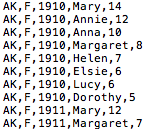

In [6]:
from IPython.display import Image
Image('./images/csv.png')

A TSV file would look like this (note that the tab separator is represented as '\t', which is not shown here):

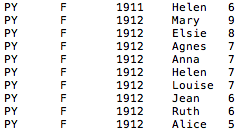

In [7]:
from IPython.display import Image
Image('./images/tsv.png')

The file `AK.csv` contains a list of names given to children in the state of Alaska from 1910 to 2015 with their frequency. Each line in this file has five elements, which are separated by commas: 

- the state abbreviation (AK for Alaska)
- gender (F/M)
- year
- name
- frequency of that name in the given year and state 

Below, we will work towards representing this data in Python as a **list of lists** (i.e., a nested list) or as a **list of dicts**. In both cases, the elements of the (first) list represent the complete rows. The individual rows, then, can be either represented as a list (without column names) or as a dictionary (with column names).

|      LIST OF LISTS        |  LIST OF DICTS            |
|:-------------------------:|:-------------------------:|
![box](./images/list_of_lists.png)  |  ![box](./images/list_of_dicts.png)

## 2. Reading CSV files

Because CSV/TSV files are essentially text files, we can open and read them in the same way as we have seen before:

In [8]:
# Read the file just as we read a text file
filename = "../Data/csv_data/baby_names/names_by_state/AK.csv"
with open(filename, "r") as csvfile:
    content = csvfile.read()

In [9]:
# we've now stored the content as a string:
print(type(content))

<class 'str'>


In [10]:
# since the table is pretty long, we're slicing the string and only printing the first 200 characters
print(content[:200])

AK,F,1910,Mary,14
AK,F,1910,Annie,12
AK,F,1910,Anna,10
AK,F,1910,Margaret,8
AK,F,1910,Helen,7
AK,F,1910,Elsie,6
AK,F,1910,Lucy,6
AK,F,1910,Dorothy,5
AK,F,1911,Mary,12
AK,F,1911,Margaret,7
AK,F,1911,Ru


Please also have a close look at the internal representation of the file. Do you see how the columns are separated by commas, and the rows by newline characters `\n`?

In [11]:
print(repr(content[:200]))

'AK,F,1910,Mary,14\nAK,F,1910,Annie,12\nAK,F,1910,Anna,10\nAK,F,1910,Margaret,8\nAK,F,1910,Helen,7\nAK,F,1910,Elsie,6\nAK,F,1910,Lucy,6\nAK,F,1910,Dorothy,5\nAK,F,1911,Mary,12\nAK,F,1911,Margaret,7\nAK,F,1911,Ru'


### 2.1 Reading rows as lists
Now, let's see how we can get to the 'list of lists' representation. We can do that by iterating over each line of this file (as we have seen before), and then split each row into columns using the `split()` method:

In [12]:
# Read the file and get all lines

# assign new line character to a variable
# (we are going to need this when processing the lines of the file)
#new line on linux/unix
newline_char = '\n'
#new line on windows (double-check this in an editor or use repr())
#newline_char = '\r\n'

# create empty list to collect the rows:
csv_data = []
# store path to file in variable
filename = "../Data/csv_data/baby_names/names_by_state/AK.csv"
# open file and read in line-by line
with open(filename, "r") as csvfile:
    for row in csvfile:
        # remove new-line charater - 
        row = row.strip(newline_char) 
        # separate the cells on comma (csv file)
        cells = row.split(",")   # split the line into cells
        csv_data.append(cells) 

# Print only first 10 rows
print(csv_data[:10])
print()

# Iterate over first 10 rows - this is more readable
for row in csv_data[:10]:
    print(row)

[['AK', 'F', '1910', 'Mary', '14'], ['AK', 'F', '1910', 'Annie', '12'], ['AK', 'F', '1910', 'Anna', '10'], ['AK', 'F', '1910', 'Margaret', '8'], ['AK', 'F', '1910', 'Helen', '7'], ['AK', 'F', '1910', 'Elsie', '6'], ['AK', 'F', '1910', 'Lucy', '6'], ['AK', 'F', '1910', 'Dorothy', '5'], ['AK', 'F', '1911', 'Mary', '12'], ['AK', 'F', '1911', 'Margaret', '7']]

['AK', 'F', '1910', 'Mary', '14']
['AK', 'F', '1910', 'Annie', '12']
['AK', 'F', '1910', 'Anna', '10']
['AK', 'F', '1910', 'Margaret', '8']
['AK', 'F', '1910', 'Helen', '7']
['AK', 'F', '1910', 'Elsie', '6']
['AK', 'F', '1910', 'Lucy', '6']
['AK', 'F', '1910', 'Dorothy', '5']
['AK', 'F', '1911', 'Mary', '12']
['AK', 'F', '1911', 'Margaret', '7']


It worked! The variable `csv_data` now contains a list of all rows in the file. Now we can easily work with the data by using the indices of the lists to access cells. Have a look at the following examples:

In [13]:
# Example: print all information of the first 10 rows
for row in csv_data[:10]:
    state = row[0]
    gender = row[1]
    year = row[2]
    name = row[3]
    frequency = row[4]
    print(state, gender, year, name, frequency)

AK F 1910 Mary 14
AK F 1910 Annie 12
AK F 1910 Anna 10
AK F 1910 Margaret 8
AK F 1910 Helen 7
AK F 1910 Elsie 6
AK F 1910 Lucy 6
AK F 1910 Dorothy 5
AK F 1911 Mary 12
AK F 1911 Margaret 7


In [14]:
# Example: print all names given in 1912
for row in csv_data:
    year = row[2]
    name = row[3]
    # note that the year is represented as a string (not an int)
    if year == "1912":
        print(name)

Mary
Elsie
Agnes
Anna
Helen
Louise
Jean
Ruth
Alice
Esther
Ethel
Margaret
Marie
John
William
George
Charles
Nick
Frank
James


### 2.2 Reading rows as dicts

We can also create a 'list of dicts'. We do this by first creating a dictionary for each row, and appending that dictionary to the list of rows. We can simply use the column headers as keys, so we can easily access the corresponding values later on. 

Note: Do you see that we also convert the numerical values to `int`?

In [15]:
# Read the file and get all lines

# again, create a list to collect the rows:
csv_data = []

filename = "../Data/csv_data/baby_names/names_by_state/AK.csv"
with open(filename, "r") as csvfile:
    for row in csvfile:
        row = row.strip("\n")      # remove all newlines
        columns = row.split(",")   # split the line into columns
        
        # Create a dictionary and add to list
        dict_row = {"state": columns[0],
                    "gender": columns[1],
                    "year": int(columns[2]),
                    "name": columns[3],
                    "frequency": int(columns[4])}
        csv_data.append(dict_row)

# First 10 rows
print(csv_data[:10])
print()

# Iterate over first 10 rows 
for row in csv_data[:10]:
    print(row)

[{'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Mary', 'frequency': 14}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Annie', 'frequency': 12}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Anna', 'frequency': 10}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Margaret', 'frequency': 8}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Helen', 'frequency': 7}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Elsie', 'frequency': 6}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Lucy', 'frequency': 6}, {'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Dorothy', 'frequency': 5}, {'state': 'AK', 'gender': 'F', 'year': 1911, 'name': 'Mary', 'frequency': 12}, {'state': 'AK', 'gender': 'F', 'year': 1911, 'name': 'Margaret', 'frequency': 7}]

{'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Mary', 'frequency': 14}
{'state': 'AK', 'gender': 'F', 'year': 1910, 'name': 'Annie', 'frequency': 12}
{'state': 'AK', 'gender': 'F', 'year': 1910

Again, we can now easily work with the data, but now we use the *names* of the columns instead of indices to access the cells. This can make the code more readable. Have a look at the following examples:

In [16]:
# Example: print all information of the first 5 rows
for row in csv_data[:5]:
    for column_name, cell_value in row.items():
        print(column_name, "=", cell_value)
    print()

state = AK
gender = F
year = 1910
name = Mary
frequency = 14

state = AK
gender = F
year = 1910
name = Annie
frequency = 12

state = AK
gender = F
year = 1910
name = Anna
frequency = 10

state = AK
gender = F
year = 1910
name = Margaret
frequency = 8

state = AK
gender = F
year = 1910
name = Helen
frequency = 7



In [17]:
# Example: print all names given in 1912
for row in csv_data:
    if row["year"] == 1912:
        print(row["name"])

Mary
Elsie
Agnes
Anna
Helen
Louise
Jean
Ruth
Alice
Esther
Ethel
Margaret
Marie
John
William
George
Charles
Nick
Frank
James


It does not really matter whether you choose for a 'list of lists' or a 'list of dicts'. Just use the one that you prefer.

## 3. Writing CSV files

Let's say now we have a table in Python stored as a 'list of lists' or as a 'list of dicts', and we want to store our result in a CSV file. This is basically the inverse process of reading a CSV file. 

### 3.1 Writing rows as lists

In order to write a list of lists as a CSV file, we need to iterate over the rows and make a string out of them. Remember that we can concatenate strings in a list with any separator with the `join()` method:

In [18]:
a_list = ["John", "john@example.nl", "555-1234"]
a_string = ",".join(a_list)
print(a_string)

John,john@example.nl,555-1234


In addition, we should use the newline character `\n` to write each row on a line.

Run the cell below and check whether it worked by opening the file `../Data/address_book.csv` in a text editor. Is everything correct? Did you use the correct new-line character?

In [19]:
# assign new line character to a variable
# (we are going to need this when processing the lines of the file)
#new line on linux/unix
newline_char = '\n'
#new line on windows (double-check this in an editor or use repr())
#newline_char = '\r\n'

# Create list of lists
address_book = [
    ["John", "john@example.nl", "555-1234"],
    ["William", "william@example.nl", "555-5678"],
    ["Jane", "jane@example.nl", "555-7777"]
]

# Write the list of lists to a CSV file
outfilename = "../Data/address_book.csv"
with open(outfilename, "w") as outfile:
    for row in address_book:
        line = f'{",".join(row)}{newline_char}'
        outfile.write(line)

### 3.2 Writing rows as dicts

In order to write a list of dicts to a CSV file, we need to first get all the values in each dictionary. The rest works exactly the same. In the following code, we use the tab separator `\t` and save it with the `.tsv` extension.

In [20]:
# Create list of dicts
address_book = [
    {"name":"John", "e-mail":"john@example.nl", "phone":"555-1234"},
    {"name":"William", "e-mail":"william@example.nl", "phone":"555-5678"},
    {"name":"Jane", "e-mail":"jane@example.nl", "phone":"555-7777"}
]


# Write the list of dicts to a TSV file
outfilename = "../Data/csv_data/address_book.tsv"
with open(outfilename, "w") as outfile:    
    
    # Write the rows using the values of the dictionaries
    for row in address_book:
        # get the values in each cell:
        # (assuming the order is always the same)
        cell_values = row.values()
        # join them using a tab (for tsv)
        line = "\t".join(cell_values) + '\n'
        outfile.write(line)

## 4. Dealing with column headers

Many csv/tsv files contain headers. This means that the first row contains the names of the columns. We easily read and write these kinds of files without having to type the headers manually. 


### 4.1 Reading csv/tsv files with a header row
Consider the file called Concreteness_ratings_Brysbaert_et_al_BRM.txt (we're reading it in and printing the first 5 lines below). 

The file has 10 columns, each of which have a column **header**. This means that all the values in the first row are not actual values. We need to treat them differently if we want to analyze the data (i.e. everything from the second row on). In addition, it would be convenient to use this information right away, without having to first inspect the file and manually type the headers as keys in dictionaries!

In [21]:
with open('../Data/csv_data/Concreteness_ratings_Brysbaert_et_al_BRM.tsv') as infile:
    lines = infile.read().split('\n')
    
for line in lines[:5]:
    print(line)

Word	Bigram	Conc.M	Conc.SD	Unknown	Total	Percent_known	SUBTLEX	Dom_Pos
roadsweeper	0	4.85	0.37	1	27	0.96	0	0
traindriver	0	4.54	0.71	3	29	0.90	0	0
tush	0	4.45	1.01	3	25	0.88	66	0
hairdress	0	3.93	1.28	0	29	1.00	1	0


Can you complete the example below?

In [22]:
data_dict_list = []

with open('../Data/csv_data/Concreteness_ratings_Brysbaert_et_al_BRM.tsv') as infile:
    lines = infile.read().split('\n')

# the first row is at index 0 and contains the headers
headers = lines[0]

# we consider everythin following the header row as data
for line in lines[1:3]:
    line_list = line.split('\t')
    header_list = headers.split('\t')
    row_dict = dict()
        
    # can you think of a way to fill the row dict? 
    # hint: check out the zip function
    # zip for iterating over two lists at the same time
    
    ### YOUR CODE ####
    
    data_dict_list.append(row_dict)

### 4.2 Writing csv/tsv files with a header row

You can also write files with headers: 


In [23]:
row1 = {'name': 'Harry', 'house' : 'Gryffindor'}
row2 = {'name': 'Ron', 'house' : 'Gryffindor'}
row3 = {'name': 'Hannah', 'house': 'Hufflepuff'}
row4 = {'name': 'Leta', 'house' : 'Slytherin'}

data_dict_list = [row1, row2, row2, row4]

for d in data_dict_list:
    print(d)
    
header_row = ### your code here

with open('../Data/csv_data/hp_example.csv', 'w') as outfile:
    # write header
    for d in data_dict_list:
        row_list = d.values()
        row = ','.join(values)
        outfile.write(row+'\n')

SyntaxError: ignored

## A note on csv/tsv files containing a lot of textual data

If you're dealing with tables containing textual data (e.g. full sentences or tweets), you will realize that splitting on commas or tabs may result in confusion (as text often contains commas and may contain tabs). Consider for instances this file: `../Data/csv_data/debate.csv`.

You may have ideas for a fix regarding this specific file and surely you will eventually find a good solution for it. However, for these more complex CSV files, we recommend that you make use of the **[csv module](https://docs.python.org/3/library/csv.html)**. Feel free to explore it yourself, but do not use it for the exercises and assignments in this course.

## Exercises

### Exercise 1:
Have another look at the code below. Can you predict what would happen if you skip some of the steps? How will the data be different?

In [24]:
filename = "../Data/csv_data/baby_names/names_by_state/AK.csv"
with open(filename, "r") as csvfile:
    csv_data = []
    for row in csvfile:
        #row = row.strip("\n")      # what happens if you skip this step?
        columns = row.split(",")   
        csv_data.append(columns) 
print(csv_data[0:2])

[['AK', 'F', '1910', 'Mary', '14\n'], ['AK', 'F', '1910', 'Annie', '12\n']]


In [25]:
filename = "../Data/csv_data/baby_names/names_by_state/AK.csv"
with open(filename, "r") as csvfile:
    csv_data = []
    for row in csvfile:
        row = row.strip("\n")      
        #columns = row.split(",")   # what happes if you skip this step?
        csv_data.append(row)        # replaced columns by row
print(csv_data[0:2])

['AK,F,1910,Mary,14', 'AK,F,1910,Annie,12']


### Exercise 2:
Read the csv data in `AK.csv` and store it as a **list of lists**. Now print the following:
- all names that started with an M given in 1990
- all unique female names (hint: create a set)
- all names that were given more than 30 times in a certain year (print name+year)
- all unique names longer than 8 letters given between 1985 and 1990

Read the csv data in `AK.csv` and store it as a **list of dicts**. Now print the following:
- all names that started with an M given in 1990
- all unique female names (hint: create a set)
- all names that were given more than 30 times in a certain year (print name+year)
- all unique names longer than 8 letters given between 1985 and 1990

### Exercise 3:
Can you think of a way to add a header to the TSV file below? Hint: make use of the dictionary keys.

In [26]:
# Create list of dicts
address_book = [
    {"name":"John", "e-mail":"john@example.com", "phone":"555-1234"},
    {"name":"William", "e-mail":"william@example.com", "phone":"555-5678"},
    {"name":"Jane", "e-mail":"jane@example.com", "phone":"555-7777"}
]

# Write the list of dicts to a TSV file
outfilename = "../Data/csv_data/address_book.tsv"
with open(outfilename, "w") as outfile:    
    
    # Write the header
    # your code here
    
    # Write the rows using the values of the dictionaries
    for row in address_book:
        column_values = row.values()
        line = "\t".join(column_values) + '\n'
        outfile.write(line)

### Exercise 4: 
Now *append* information about Jennifer and Justin (stored as a list) at the bottom of this `address_book.tsv` file (attention: make sure you do not overwrite the contents of the file).

In [27]:
more_people = [
    ["Jennifer", "jennifer@example.com", "555-9876"],
    ["Justin", "justin@example.com", "555-5555"]
]

# Append the data to the `address_book.tsv` file

### Exercise 5: 
Create a function `load_tabular_data(filename, delimiter)` that receives the filename and a delimiter as input parameters, and returns the file content as a list of lists. Then we can call this function for CSV (with a comma as an argument) and for TSV (with a tabulator as an argument). Also make sure that `delimiter` is a keyword parameter, with a defaul value ','.

In [28]:
# Create your function here

    
# Now let's test the function
csv_filename = "../Data/csv_data/baby_names/names_by_state/AK.csv"
